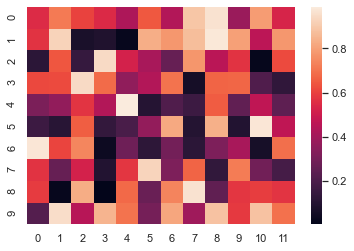

In [2]:
import numpy as np; 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set_theme()

path='../../EventsDataset.xlsx'

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

(50, 4000)


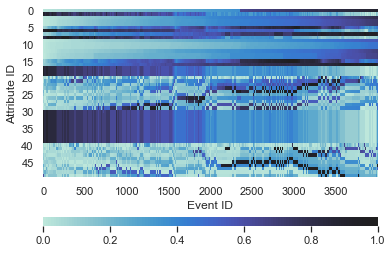

In [3]:
# import xlrd
# #打开excel
# wb = xlrd.open_workbook(path)
# #按工作簿定位工作表
# sh = wb.sheet_by_name('d1')
# print(sh.nrows)#有效数据行数
# print(sh.ncols)#有效数据列数
# print(sh.cell(0,0).value)#输出第一行第一列的值
# print(sh.row_values(0))#输出第一行的所有值

# #遍历excel，打印所有数据
# for i in range(sh.nrows):
#     print(sh.row_values(i))

df = pd.read_excel(path,sheet_name='d1')
data = df.values/1000000
data = data[0:4000][:]
data = np.transpose(data)
print(data.shape)

grid_kws = {"height_ratios": (.9, .05), "hspace": .45}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(data,vmin=0, vmax=1,center=1, 
                 xticklabels=500, yticklabels=5, 
                 ax=ax,cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})
ax.set_xlabel('Event ID',fontsize=12)
ax.set_ylabel('Attribute ID',fontsize=12)
ax.tick_params(axis='y', rotation=0)

gcf = plt.gcf()
plt.show()
gcf.savefig('./DatasetValueDistribution1.pdf', format='pdf', bbox_inches='tight')

(50, 4000)
maxCnt:  2728


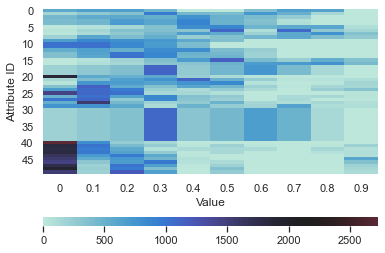

In [4]:
eventNum=4000
maxValue=1000000

df = pd.read_excel(path,sheet_name='d1') # eventID -> attr
data = df.values/maxValue #  to [0,1)
data = data[0:eventNum][:]
data = np.transpose(data) # attr -> eventID
print(data.shape)

intervalCnt = 10 # 把【0,1】划分成多少个子区间进行后续统计
minGap = 1/intervalCnt # 最小间隔，子区间长度，用于计算落入哪个子区间
attrNum = 50 # 属性个数
fb = [[0]*intervalCnt for i in range(0,attrNum)]

for i in range(attrNum):
    for j in range(eventNum):
        fb[i][int(data[i][j]/minGap)]+=1
maxCnt = max(max(c for c in fb))
print('maxCnt: ', maxCnt)

# for i in range(attrNum):
#     for j in range(intervalCnt):
#         fb[i][j]/=maxCnt
# maxCnt=1

grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(fb,vmin=0,vmax=maxCnt, center=maxCnt*0.8, xticklabels=int(intervalCnt/10),yticklabels=5, 
                 ax=ax,cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})
ax.set_xlabel('Value',fontsize=12)
ax.set_ylabel('Attribute ID',fontsize=12)
# ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
ax.tick_params(axis='y', rotation=0)

gcf = plt.gcf()
plt.show()
gcf.savefig('./DatasetValueDistribution2.pdf', format='pdf', bbox_inches='tight')

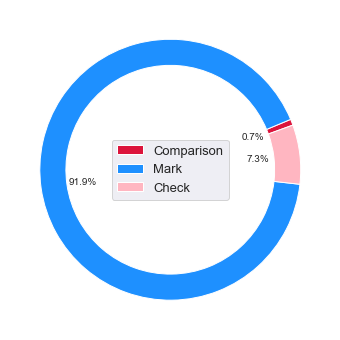

In [50]:

cmp=44377
mark=5444353
check=434560
sum_=cmp+mark+check
cmp/=sum_
mark/=sum_
check/=sum_

label=["Comparison","Mark","Check"]
Color = ['Crimson', 'DODGERBLUE', 'LightPink']

# plt.pie([cmp,mark,check], startangle=90, colors=Color)
# plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([cmp,mark,check], 
       wedgeprops={'width':0.2}, 
       startangle=20, 
       pctdistance=0.68,
       autopct='%.1f%%',
       colors=Color)

plt.legend(label,fontsize=13,loc='center')

gcf = plt.gcf()
plt.show()
gcf.savefig('./exp1_ReinTimeDistribution.pdf', format='pdf', bbox_inches='tight')